In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [48]:
dfile_path = r"C:\Users\antho\OneDrive - University College Dublin\ACM20030 1\ALPACA\Dyt-desktop.csv"
tfile_path = r"C:\Users\antho\OneDrive - University College Dublin\ACM20030 1\ALPACA\Dyt-tablet.csv"
# Reading file
dData = pd.read_csv(dfile_path, index_col=0, na_values=['(NA)'])
tData = pd.read_csv(tfile_path, index_col=0, na_values=['(NA)'])
# Display the first few rows
print('Desktop Data:')
print(dData.head())
print('Tablet Data:')
print(tData.head())

Desktop Data:
Empty DataFrame
Columns: []
Index: [Male;No;Yes;7;10;10;0;10;1;0;5;5;0;5;1;0;6;6;0;6;1;0;2;2;0;2;1;0;3;3;0;3;1;0;4;1;3;1;0.25;0.75;5;5;0;5;1;0;4;3;1;3;0.75;0.25;1;0;1;0;0;1;1;1;0;1;1;0;3;1;2;1;0.333333;0.666667;3;3;0;3;1;0;3;3;0;3;1;0;4;4;0;4;1;0;2;2;0;2;1;0;2;2;0;2;1;0;3;3;0;3;1;0;2;2;0;2;1;0;4;3;1;3;0.75;0.25;5;1;4;1;0.2;0.8;3;1;2;1;0.333333;0.666667;4;1;3;1;0.25;0.75;4;3;1;3;0.75;0.25;3;2;1;2;0.666667;0.333333;3;3;0;3;1;0;5;3;2;3;0.6;0.4;9;1;1;1;0.111111;0.111111;6;2;0;2;0.333333;0;4;1;1;1;0.25;0.25;14;1;2;1;0.0714286;0.142857;18;0;0;0;0;0;17;2;0;2;0.117647;0;No, Female;Yes;Yes;13;12;12;0;12;1;0;11;11;0;11;1;0;10;10;0;10;1;0;4;4;0;4;1;0;5;5;0;5;1;0;5;5;0;5;1;0;5;4;1;4;0.8;0.2;6;5;1;5;0.833333;0.166667;5;4;1;4;0.8;0.2;10;10;0;10;1;0;5;4;1;4;0.8;0.2;5;5;0;5;1;0;4;4;0;4;1;0;10;10;0;10;1;0;5;5;0;5;1;0;4;4;0;4;1;0;4;4;0;4;1;0;4;3;1;3;0.75;0.25;8;3;5;3;375;625;3;1;2;1;0.333333;0.666667;3;1;2;1;0.333333;0.666667;9;7;2;7;0.777778;0.222222;6;5;1;5;0.833333;0.166667;3;2;1;2;0.66

In [49]:
def SeparateColumns(dataSetName):
    columns = defaultdict(list)
    with open(dataSetName, 'r') as f:
        reader = csv.reader(f, delimiter=';')
        headers = next(reader)
        column_nums = range(len(headers)) # Do NOT change to xrange
        for row in reader:
            for i in column_nums:
            
                columns[headers[i]].append(row[i])
    # Following line is only necessary if you want a key error for invalid column names
    return dict(columns)

In [50]:
def cleanData(data) :
    for col in data.columns.values:
        data[col] = data[col].astype('string')
    #----------
    for col in data.columns.values:
        data[col] = data[col].astype('float',errors = 'ignore')
    #-----------
    data['Gender']=data.Gender.map({'Male': 1, 'Female': 2})
    data['Dyslexia']=data.Dyslexia.map({'No': 0, 'Yes': 1})
    data['Nativelang']=data.Nativelang.map({'No': 0, 'Yes': 1})
    data['Otherlang']=data.Otherlang.map({'No': 0, 'Yes': 1})

In [51]:
import csv
from collections import defaultdict
columns = SeparateColumns(dfile_path)
dtData=pd.DataFrame.from_dict(columns)
cleanData(dtData)

dtData.head()

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,...,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,1,0,1,7.0,10.0,10.0,0.0,10.0,1.0,0.0,...,0.0,0.000000,0.00,17.0,2.0,0.0,2.0,0.117647,0.000000,0
1,2,1,1,13.0,12.0,12.0,0.0,12.0,1.0,0.0,...,4.0,0.114286,0.00,26.0,2.0,2.0,2.0,0.076923,0.076923,1
2,2,0,1,7.0,6.0,6.0,0.0,6.0,1.0,0.0,...,4.0,0.114286,0.00,26.0,1.0,3.0,1.0,0.038462,0.115385,0
3,2,0,1,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00,1.0,0.0,0.0,0.0,0.000000,0.000000,0
4,2,0,1,8.0,4.0,4.0,0.0,4.0,1.0,0.0,...,1.0,25.000000,0.05,26.0,2.0,2.0,2.0,0.076923,0.076923,0


In [52]:
columns = SeparateColumns(tfile_path)
tabData=pd.DataFrame.from_dict(columns)
tabData.replace(["NULL"], np.nan, inplace = True)

cleanData(tabData)

tabData.head()

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,...,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,1,1,0,7.0,6.0,6.0,0.0,6.0,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,1,0,7.0,7.0,7.0,0.0,7.0,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,1,0,7.0,6.0,6.0,0.0,6.0,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1,1,0,7.0,5.0,5.0,0.0,5.0,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1,1,0,7.0,8.0,6.0,2.0,8.0,0.75,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [53]:
stateOfNUll= tabData.isnull().any()
i = 0
for state in stateOfNUll : 
    if(state):  
        tabData[stateOfNUll.index[i]].fillna(round(tabData[stateOfNUll.index[i]].mean() , 4), inplace=True)
    i = i + 1    

tabData

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,...,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,1,1,0,7.0,6.0,6.0,0.0,6.0,1.00,0.00,...,46.8333,0.386300,0.5439,52.51,2.7851,7.9719,52.51,0.970900,2.225400,0
1,2,1,0,7.0,7.0,7.0,0.0,7.0,1.00,0.00,...,46.8333,0.386300,0.5439,52.51,2.7851,7.9719,52.51,0.970900,2.225400,0
2,2,1,0,7.0,6.0,6.0,0.0,6.0,1.00,0.00,...,46.8333,0.386300,0.5439,52.51,2.7851,7.9719,52.51,0.970900,2.225400,0
3,1,1,0,7.0,5.0,5.0,0.0,5.0,1.00,0.00,...,46.8333,0.386300,0.5439,52.51,2.7851,7.9719,52.51,0.970900,2.225400,0
4,1,1,0,7.0,8.0,6.0,2.0,8.0,0.75,0.25,...,46.8333,0.386300,0.5439,52.51,2.7851,7.9719,52.51,0.970900,2.225400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,1,1,0,17.0,13.0,13.0,0.0,13.0,1.00,0.00,...,35.0000,0.114286,0.0000,26.00,4.0000,0.0000,26.00,0.153846,0.000000,0
1391,2,1,1,17.0,9.0,9.0,0.0,9.0,1.00,0.00,...,35.0000,0.114286,0.0000,26.00,4.0000,0.0000,26.00,0.153846,0.000000,0
1392,1,1,1,17.0,10.0,10.0,0.0,10.0,1.00,0.00,...,35.0000,0.114286,0.0000,27.00,3.0000,2.0000,27.00,0.111111,0.074074,0
1393,2,1,1,17.0,11.0,11.0,0.0,11.0,1.00,0.00,...,35.0000,0.114286,0.0000,26.00,4.0000,0.0000,26.00,0.153846,0.000000,0


In [54]:
cols_with_missing = [col for col in tabData.columns if tabData[col].isnull().any()]

# Drop columns desktop data
reduced_desktopData = dtData.drop(cols_with_missing, axis=1)

# Drop columns tablet data
reduced_tabletData = tabData.drop(cols_with_missing, axis=1)

In [55]:
commonalityColumns = ['Gender','Nativelang','Otherlang','Age' , 'Dyslexia']
for i in  range(30):
    if((i>=0 and i<12) or (i>=13 and i<17) or i==21 or i==22 or i==29):
        commonalityColumns.append('Clicks'+str(i+1))
        commonalityColumns.append('Hits'+str(i+1))
        commonalityColumns.append('Misses'+str(i+1))
        commonalityColumns.append('Score'+str(i+1))
        commonalityColumns.append('Accuracy'+str(i+1))
        commonalityColumns.append('Missrate'+str(i+1))
    
reduced_desktopData=reduced_desktopData.loc[:,commonalityColumns]
reduced_tabletData=reduced_tabletData.loc[:,commonalityColumns]


In [56]:
y=reduced_desktopData['Dyslexia']
X=reduced_desktopData.loc[:, reduced_desktopData.columns != 'Dyslexia']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
#----RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8911055694098088


Training Data:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000

Test Data:
Accuracy: 0.8911
Precision: 1.0000
Recall: 0.0296


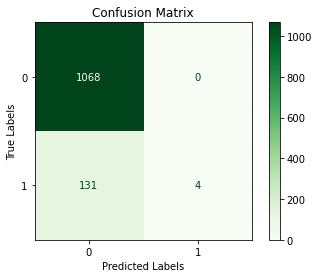

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

cm=confusion_matrix(y_test,y_pred)

disp=ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


train_pred_labels=model.predict(X_train)


train_accuracy = accuracy_score(y_train, train_pred_labels)
train_precision = precision_score(y_train, train_pred_labels)
train_recall = recall_score(y_train, train_pred_labels)


test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

print('Training Data:')
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')

print('\nTest Data:')
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')

In [60]:
from sklearn import neighbors, metrics
model = neighbors.KNeighborsClassifier()

# Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8836242726517041


Training Data:
Accuracy: 0.9103
Precision: 0.7568
Recall: 0.2179

Test Data:
Accuracy: 0.8836
Precision: 0.4194
Recall: 0.0963


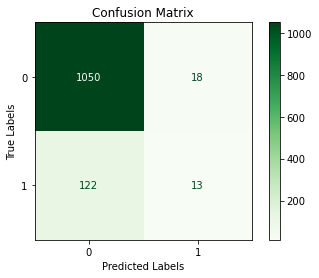

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

cm=confusion_matrix(y_test,y_pred)

disp=ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


train_pred_labels=model.predict(X_train)


train_accuracy = accuracy_score(y_train, train_pred_labels)
train_precision = precision_score(y_train, train_pred_labels)
train_recall = recall_score(y_train, train_pred_labels)


test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

print('Training Data:')
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')

print('\nTest Data:')
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')

In [62]:
from sklearn import svm
model=svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8877805486284289


Training Data:
Accuracy: 0.8955
Precision: 1.0000
Recall: 0.0078

Test Data:
Accuracy: 0.8878
Precision: 0.0000
Recall: 0.0000


C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


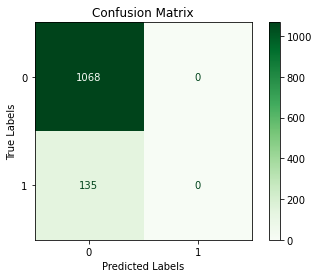

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

cm=confusion_matrix(y_test,y_pred)

disp=ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


train_pred_labels=model.predict(X_train)


train_accuracy = accuracy_score(y_train, train_pred_labels)
train_precision = precision_score(y_train, train_pred_labels)
train_recall = recall_score(y_train, train_pred_labels)


test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

print('Training Data:')
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')

print('\nTest Data:')
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')

In [64]:
print(y_pred)

[0 0 0 ... 0 0 0]


Training Data:
Accuracy: 0.8955
Precision: 1.0000
Recall: 0.0078

Test Data:
Accuracy: 0.8878
Precision: 0.0000
Recall: 0.0000


C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


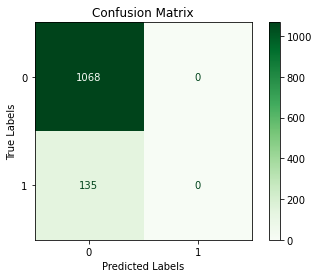

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

cm=confusion_matrix(y_test,y_pred)

disp=ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


train_pred_labels=model.predict(X_train)


train_accuracy = accuracy_score(y_train, train_pred_labels)
train_precision = precision_score(y_train, train_pred_labels)
train_recall = recall_score(y_train, train_pred_labels)


test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

print('Training Data:')
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')

print('\nTest Data:')
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import random

def euclidean(point, dataset):
    squared_diff = np.square(dataset - point)
    sum_squared_diff = np.sum(squared_diff, axis=1)
    return np.sqrt(sum_squared_diff)

class KMeans:
    def __init__(self, n_clusters=8, max_iter=300, random_state=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        
    def fit(self, X_train):
        X_train = np.array(X_train)
        np.random.seed(self.random_state)
        
        # Pick a random point from train data for first centroid
        self.centroids = [X_train[random.choice(range(X_train.shape[0]))]]
        
        # Set the remaining initial guesses using the k-means++ method
        for _ in range(self.n_clusters - 1):
            dists = np.min([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            dists /= np.sum(dists)
            new_centroid_idx = np.random.choice(range(len(X_train)), size=1, p=dists)[0]
            self.centroids.append(X_train[new_centroid_idx])
        
        self.centroids = np.array(self.centroids)
        
        for iteration in range(self.max_iter):
            sorted_points = [[] for _ in range(self.n_clusters)]
            
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
                
            prev_centroids = self.centroids.copy()
            self.centroids = [np.mean(cluster, axis=0) if len(cluster) > 0 else prev_centroids[i]
                              for i, cluster in enumerate(sorted_points)]
            
            if np.array_equal(prev_centroids, self.centroids):
                break

    def evaluate(self, X):
        X = np.array(X)
        centroid_idxs = []
        for x in X:
            dists_cent = euclidean(x, self.centroids)
            closest_centroid_idx = np.argmin(dists_cent)
            centroid_idxs.append(closest_centroid_idx)
        return centroid_idxs

model = KMeans(n_clusters=1)
model.fit(X_train)
y_pred = model.evaluate(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8877805486284289


Training Data:
Accuracy: 0.8947
Precision: 0.0000
Recall: 0.0000

Test Data:
Accuracy: 0.8878
Precision: 0.0000
Recall: 0.0000


C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


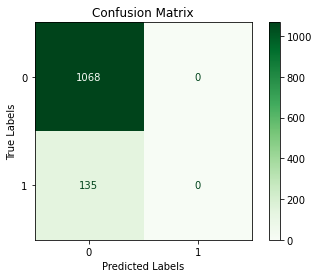

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

cm=confusion_matrix(y_test,y_pred)

disp=ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


train_pred_labels=model.evaluate(X_train)


train_accuracy = accuracy_score(y_train, train_pred_labels)
train_precision = precision_score(y_train, train_pred_labels)
train_recall = recall_score(y_train, train_pred_labels)


test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

print('Training Data:')
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')

print('\nTest Data:')
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')

In [68]:
from sklearn.cluster import DBSCAN


model = DBSCAN(eps=0.5)
y_train_pred = model.fit_predict(X_train)
y_test_pred = model.fit_predict(X_test)

print("Adjusted Rand Index:", metrics.adjusted_rand_score(y_test, y_test_pred))

Adjusted Rand Index: 0.0


In [75]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

# Define the model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2636 - loss: 38.6483 - val_accuracy: 0.8916 - val_loss: 1.7131
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7341 - loss: 8.6683 - val_accuracy: 0.8916 - val_loss: 1.9559
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 4.4393 - val_accuracy: 0.8916 - val_loss: 1.6765
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7869 - loss: 4.1338 - val_accuracy: 0.8916 - val_loss: 1.2591
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8197 - loss: 2.7982 - val_accuracy: 0.8916 - val_loss: 1.1765
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7993 - loss: 2.6050 - val_accuracy: 0.8916 - val_loss: 0.9765
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8263 - loss: 1.8062 - val_accuracy: 0.8916 - val_loss: 0.8622
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8475 - loss: 1.6601 - val_accuracy: 0.8916 - 

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8884 - loss: 0.3879 - val_accuracy: 0.8916 - val_loss: 0.3371
Epoch 52/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8910 - loss: 0.3637 - val_accuracy: 0.8916 - val_loss: 0.3724
Epoch 53/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8877 - loss: 0.3774 - val_accuracy: 0.8916 - val_loss: 0.3546
Epoch 54/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8838 - loss: 0.3721 - val_accuracy: 0.8916 - val_loss: 0.3398
Epoch 55/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9037 - loss: 0.3442 - val_accuracy: 0.8916 - val_loss: 0.3388
Epoch 56/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8928 - loss: 0.3501 - val_accuracy: 0.8916 - val_loss: 0.3408
Epoch 57/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8943 - loss: 0.3488 - val_accuracy: 0.8916 - val_loss: 0.3544
Epoch 58/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8939 - loss: 0.3627 - val_accuracy: 0.8916 - val_lo

In [77]:
train_pred_labels

array([[8.89052272e-01, 1.10947751e-01, 2.50419542e-18, ...,
        3.75658180e-15, 3.80510656e-19, 1.89016988e-13],
       [8.89866352e-01, 1.10133670e-01, 1.42373727e-18, ...,
        6.02354987e-16, 9.06447366e-19, 3.01125552e-13],
       [8.84466469e-01, 1.15533583e-01, 1.25980666e-16, ...,
        8.50519064e-14, 8.75823994e-17, 5.65872913e-12],
       ...,
       [8.78930748e-01, 1.21069334e-01, 3.07042504e-13, ...,
        4.97152076e-11, 2.44619524e-14, 7.73515307e-10],
       [8.76703560e-01, 1.23296432e-01, 4.05848789e-14, ...,
        1.89694874e-12, 9.18948836e-13, 2.71427852e-10],
       [9.13785636e-01, 8.62143189e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.47738297e-34]], dtype=float32)

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

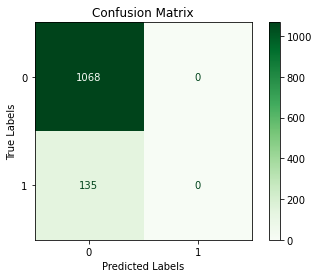

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

cm=confusion_matrix(y_test,y_pred)

disp=ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


train_pred_labels=model.predict(X_train)
threshold = 0.5

# Convert to binary array
train_pred_labels = (train_pred_labels >= threshold).astype(int)

train_accuracy = accuracy_score(y_train, train_pred_labels)
train_precision = precision_score(y_train, train_pred_labels)
train_recall = recall_score(y_train, train_pred_labels)


test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

print('Training Data:')
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')

print('\nTest Data:')
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)  
# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
scaler = StandardScaler()



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

cm=confusion_matrix(y_test,y_pred)

disp=ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


train_pred_labels=model.predict(X_train)


train_accuracy = accuracy_score(y_train, train_pred_labels)
train_precision = precision_score(y_train, train_pred_labels)
train_recall = recall_score(y_train, train_pred_labels)


test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

print('Training Data:')
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')

print('\nTest Data:')
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')

In [ ]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Example data preprocessing for tabular data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the dense model for tabular data
def make_dense_model():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Adjust input shape
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')  # 10 classes
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Instantiate and summarize the model
dense_model = make_dense_model()
dense_model.summary()

# Training the Dense model for tabular data
dense_history = dense_model.fit(X_train_scaled, y_train, batch_size=86, epochs=40, validation_split=0.2, verbose=1)

# Make predictions with the Dense model
y_pred_probs_dense = dense_model.predict(X_test_scaled)
y_pred_dense = np.argmax(y_pred_probs_dense, axis=1)
print("Dense Model Accuracy:", accuracy_score(y_test, y_pred_dense))


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

cm=confusion_matrix(y_test,y_pred)

disp=ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


train_pred_labels=model.predict(X_train)


train_accuracy = accuracy_score(y_train, train_pred_labels)
train_precision = precision_score(y_train, train_pred_labels)
train_recall = recall_score(y_train, train_pred_labels)


test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

print('Training Data:')
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')

print('\nTest Data:')
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')